In [1]:
import warnings
import pandas as pd
warnings.filterwarnings("ignore")
# show graphs in jupyter
%reload_ext autoreload
%autoreload 2
%matplotlib inline
# display all columns/rows and what's inside
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)

In [2]:
# https://towardsdatascience.com/multi-label-text-classification-5c505fdedca8#--responses
import matplotlib.pyplot as plt

import numpy
import json
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from bs4 import BeautifulSoup
import re
import csv
from itertools import cycle
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import *
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from skmultilearn.problem_transform import ClassifierChain
from sklearn.linear_model import LogisticRegression
from skmultilearn.problem_transform import LabelPowerset
from skmultilearn.adapt import MLkNN
from scipy.sparse import csr_matrix, lil_matrix
from sklearn.preprocessing import MultiLabelBinarizer
import pickle
from sklearn.svm import SVC
from skmultilearn.dataset import load_dataset
from skmultilearn.ext import Keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [3]:
# list of metrics
Evals = []

# 3. Multi-Label Classification


In [4]:
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv("yeast.csv") 
# Preview the first 5 lines of the loaded data 
print(data.shape)
# X_train, y_train
y = data.iloc[:,-14:]
X = data.iloc[:,:-14]
X = X.values
y = y.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

(2417, 117)


## 3.1. Multiple Binary Classifications - (Binary Relevance)


### 3.1.1  BinaryRelevance MLP

In [5]:
def create_model_single_class(input_dim, output_dim):
    # create model
    model = Sequential()
    model.add(Dense(12, input_dim=input_dim, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(output_dim, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

KERAS_PARAMS = dict(epochs=10, batch_size=100, verbose=0)
clf = BinaryRelevance(classifier=Keras(create_model_single_class, False, KERAS_PARAMS), require_dense=[True,True])
clf.fit(X_train, y_train)
result = clf.predict(X_test)

In [6]:
# accuracy   None, 'micro', 'macro', 'weighted', 'samples'
Accuracy = accuracy_score(y_test,result.toarray())
Micro_Precision = precision_score(y_test,result, average='micro')
Micro_Recall = recall_score(y_test,result, average='micro')
Micro_F1 = f1_score(y_test,result, average='micro')
Micro_Average_Prec = average_precision_score(y_test, result.toarray(), average='micro')
Macro_Precision = precision_score(y_test,result, average='macro')
Macro_Recall = recall_score(y_test,result, average='macro')
Macro_F1 = f1_score(y_test,result, average='macro')
Macro_Average_Prec = average_precision_score(y_test, result.toarray(), average='macro')
Samples_Average_Prec = average_precision_score(y_test, result.toarray(), average='samples')
Weighted_Average_Prec = average_precision_score(y_test, result.toarray(), average='weighted')
Hamming_loss = hamming_loss(y_test,result)
Ranking_loss = label_ranking_loss(y_test, result.toarray())
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
#fpr["micro"], tpr["micro"], _  = roc_curve(y_test.toarray(), result)
fpr, tpr, thresholds = roc_curve(y_test.ravel(), result.toarray().ravel())
Micro_Roc_auc = auc(fpr, tpr)
Coverage_error = coverage_error(y_test, result.toarray())
label_ranking_avg_prec_score = label_ranking_average_precision_score(y_test, result.toarray())
Jaccard_score = jaccard_score(y_test, result.toarray(), average='samples')
Jaccard_score_macro = jaccard_score(y_test, result.toarray(), average='macro')
print("BinaryReMLP Accuracy = ",Accuracy)
print("BinaryReMLP Micro_Precision = ",Micro_Precision)
print("BinaryReMLP Micro_Recall = ",Micro_Recall)
print("BinaryReMLP Micro_F1 = ",Micro_F1)
print("BinaryReMLP Micro_Average_Prec = ",Micro_Average_Prec)
print("BinaryReMLP Macro_Precision = ",Macro_Precision)
print("BinaryReMLP Macro_Recall = ",Macro_Recall)
print("BinaryReMLP Macro_F1 = ",Macro_F1)
print("BinaryReMLP Macro_Average_Prec = ",Macro_Average_Prec)
print("BinaryReMLP Samples_Average_Prec = ",Samples_Average_Prec)
print("BinaryReMLP Weighted_Average_Prec = ",Weighted_Average_Prec)
print("BinaryReMLP Hamming_loss = ",Hamming_loss)
print("BinaryReMLP Ranking_loss = ",Ranking_loss)
print("BinaryReMLP Micro_Roc_auc = ",Micro_Roc_auc)
print("BinaryReMLP Coverage_error = ",Coverage_error)
print("BinaryReMLP label_ranking_average_precision_score = ",label_ranking_avg_prec_score)
print("BinaryReMLP Jaccard_score = ",Jaccard_score)
print("BinaryReMLP Jaccard_score_macro = ",Jaccard_score_macro)
Eval1 = ['BinaryReMLP',Accuracy,Micro_Precision,Micro_Recall,Micro_F1,Micro_Average_Prec,
         Macro_Precision,Macro_Recall,Macro_F1,Macro_Average_Prec,Samples_Average_Prec,Weighted_Average_Prec,Hamming_loss,
         Ranking_loss,Micro_Roc_auc,Coverage_error,label_ranking_avg_prec_score,Jaccard_score,Jaccard_score_macro]
Evals.append(Eval1)

BinaryReMLP Accuracy =  0.12155388471177944
BinaryReMLP Micro_Precision =  0.7195491980927612
BinaryReMLP Micro_Recall =  0.49522673031026254
BinaryReMLP Micro_F1 =  0.5866760911821877
BinaryReMLP Micro_Average_Prec =  0.5077900503745423
BinaryReMLP Macro_Precision =  0.36580089912825203
BinaryReMLP Macro_Recall =  0.2641818238011672
BinaryReMLP Macro_F1 =  0.28009066470403315
BinaryReMLP Macro_Average_Prec =  0.3428193171981871
BinaryReMLP Samples_Average_Prec =  0.5835034013605441
BinaryReMLP Weighted_Average_Prec =  0.5001274713448178
BinaryReMLP Hamming_loss =  0.2093626924453992
BinaryReMLP Ranking_loss =  0.5244531217678371
BinaryReMLP Micro_Roc_auc =  0.7062450787101185
BinaryReMLP Coverage_error =  12.414786967418546
BinaryReMLP label_ranking_average_precision_score =  0.5835034013605458
BinaryReMLP Jaccard_score =  0.4491058996698095
BinaryReMLP Jaccard_score_macro =  0.20912667248098332


### 3.1.2  BinaryRelevance SVM

In [7]:
# initialize Binary Relevance multi-label classifier
# with an SVM classifier  # SVM in scikit only supports the X matrix in sparse representation
# Setup the classifier
classifier = BinaryRelevance(classifier=SVC(), require_dense=[False,True])
# Train
classifier.fit(X_train, y_train)
# Predict
y_pred = classifier.predict(X_test)

In [8]:
# accuracy   None, 'micro', 'macro', 'weighted', 'samples'
# In multilabel classification, this function computes subset_accuracy:
Accuracy = accuracy_score(y_test,y_pred)  
Micro_Precision = precision_score(y_test,y_pred, average='micro')
Micro_Recall = recall_score(y_test,y_pred, average='micro')
Micro_F1 = f1_score(y_test,y_pred, average='micro')
Micro_Average_Prec = average_precision_score(y_test, y_pred.toarray(), average='micro')
Macro_Precision = precision_score(y_test,y_pred, average='macro')
Macro_Recall = recall_score(y_test,y_pred, average='macro')
Macro_F1 = f1_score(y_test,y_pred, average='macro')
Macro_Average_Prec = average_precision_score(y_test, y_pred.toarray(), average='macro')
Samples_Average_Prec = average_precision_score(y_test, y_pred.toarray(), average='samples')
Weighted_Average_Prec = average_precision_score(y_test, y_pred.toarray(), average='weighted')
Hamming_loss = hamming_loss(y_test,y_pred)
Ranking_loss = label_ranking_loss(y_test, y_pred.toarray())
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
#fpr["micro"], tpr["micro"], _  = roc_curve(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test.ravel(), y_pred.toarray().ravel())
Micro_Roc_auc = auc(fpr, tpr)
Coverage_error = coverage_error(y_test, y_pred.toarray())
label_ranking_avg_prec_score = label_ranking_average_precision_score(y_test, y_pred.toarray())
Jaccard_score = jaccard_score(y_test, y_pred, average='samples')
Jaccard_score_macro = jaccard_score(y_test, y_pred, average='macro')
print("BinaryReSVC Accuracy = ",Accuracy)
print("BinaryReSVC Micro_Precision = ",Micro_Precision)
print("BinaryReSVC Micro_Recall = ",Micro_Recall)
print("BinaryReSVC Micro_F1 = ",Micro_F1)
print("BinaryReSVC Micro_Average_Prec = ",Micro_Average_Prec)
print("BinaryReSVC Macro_Precision = ",Macro_Precision)
print("BinaryReSVC Macro_Recall = ",Macro_Recall)
print("BinaryReSVC Macro_F1 = ",Macro_F1)
print("BinaryReSVC Macro_Average_Prec = ",Macro_Average_Prec)
print("BinaryReSVC Samples_Average_Prec = ",Samples_Average_Prec)
print("BinaryReSVC Weighted_Average_Prec = ",Weighted_Average_Prec)
print("BinaryReSVC Hamming_loss = ",Hamming_loss)
print("BinaryReSVC Ranking_loss = ",Ranking_loss)
print("BinaryReSVC Micro_Roc_auc = ",Micro_Roc_auc)
print("BinaryReSVC Coverage_error = ",Coverage_error)
print("BinaryReSVC label_ranking_average_precision_score = ",label_ranking_avg_prec_score)
print("BinaryReSVC Jaccard_score = ",Jaccard_score)
print("BinaryReSVC Jaccard_score_macro = ",Jaccard_score_macro)
Eval2 = ['BinaryReSVC',Accuracy,Micro_Precision,Micro_Recall,Micro_F1,Micro_Average_Prec,
         Macro_Precision,Macro_Recall,Macro_F1,Macro_Average_Prec,Samples_Average_Prec,Weighted_Average_Prec,Hamming_loss,
         Ranking_loss,Micro_Roc_auc,Coverage_error,label_ranking_avg_prec_score,Jaccard_score,Jaccard_score_macro]
Evals.append(Eval2)

BinaryReSVC Accuracy =  0.015037593984962405
BinaryReSVC Micro_Precision =  0.7367135003054368
BinaryReSVC Micro_Recall =  0.3597852028639618
BinaryReSVC Micro_F1 =  0.4834636199639206
BinaryReSVC Micro_Average_Prec =  0.45714597742030455
BinaryReSVC Macro_Precision =  0.22692445399212316
BinaryReSVC Macro_Recall =  0.1516545650361312
BinaryReSVC Macro_F1 =  0.13731937182293702
BinaryReSVC Macro_Average_Prec =  0.3044773268461593
BinaryReSVC Samples_Average_Prec =  0.5303760393046106
BinaryReSVC Weighted_Average_Prec =  0.4565155430341965
BinaryReSVC Hamming_loss =  0.23066595059076261
BinaryReSVC Ranking_loss =  0.6582683711443109
BinaryReSVC Micro_Roc_auc =  0.6523350566749477
BinaryReSVC Coverage_error =  13.80576441102757
BinaryReSVC label_ranking_average_precision_score =  0.5303760393046136
BinaryReSVC Jaccard_score =  0.33980636114094764
BinaryReSVC Jaccard_score_macro =  0.11352755369046096


### 3.1.3  BinaryRelevance GaussianNB

In [9]:
#Binary Relevance GaussianNB
BinaryReGaussianNB = BinaryRelevance(GaussianNB())
BinaryReGaussianNB.fit(X_train,y_train)
br_predictions = BinaryReGaussianNB.predict(X_test)

In [10]:
# accuracy   None, 'micro', 'macro', 'weighted', 'samples'
Accuracy = accuracy_score(y_test,br_predictions.toarray())
Micro_Precision = precision_score(y_test,br_predictions, average='micro')
Micro_Recall = recall_score(y_test,br_predictions, average='micro')
Micro_F1 = f1_score(y_test,br_predictions, average='micro')
Micro_Average_Prec = average_precision_score(y_test, br_predictions.toarray(), average='micro')
Macro_Precision = precision_score(y_test,br_predictions, average='macro')
Macro_Recall = recall_score(y_test,br_predictions, average='macro')
Macro_F1 = f1_score(y_test,br_predictions, average='macro')
Macro_Average_Prec = average_precision_score(y_test, br_predictions.toarray(), average='macro')
Samples_Average_Prec = average_precision_score(y_test, br_predictions.toarray(), average='samples')
Weighted_Average_Prec = average_precision_score(y_test, br_predictions.toarray(), average='weighted')
Hamming_loss = hamming_loss(y_test,br_predictions)
Ranking_loss = label_ranking_loss(y_test, br_predictions.toarray())
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
#fpr["micro"], tpr["micro"], _  = roc_curve(y_test.toarray(), br_predictions)
fpr, tpr, thresholds = roc_curve(y_test.ravel(), br_predictions.toarray().ravel())
Micro_Roc_auc = auc(fpr, tpr)
Coverage_error = coverage_error(y_test, br_predictions.toarray())
label_ranking_avg_prec_score = label_ranking_average_precision_score(y_test, br_predictions.toarray())
Jaccard_score = jaccard_score(y_test, br_predictions, average='samples')
Jaccard_score_macro = jaccard_score(y_test, br_predictions, average='macro')
print("BinaryReGaussianNB Accuracy = ",Accuracy)
print("BinaryReGaussianNB Micro_Precision = ",Micro_Precision)
print("BinaryReGaussianNB Micro_Recall = ",Micro_Recall)
print("BinaryReGaussianNB Micro_F1 = ",Micro_F1)
print("BinaryReGaussianNB Micro_Average_Prec = ",Micro_Average_Prec)
print("BinaryReGaussianNB Macro_Precision = ",Macro_Precision)
print("BinaryReGaussianNB Macro_Recall = ",Macro_Recall)
print("BinaryReGaussianNB Macro_F1 = ",Macro_F1)
print("BinaryReGaussianNB Macro_Average_Prec = ",Macro_Average_Prec)
print("BinaryReGaussianNB Samples_Average_Prec = ",Samples_Average_Prec)
print("BinaryReGaussianNB Weighted_Average_Prec = ",Weighted_Average_Prec)
print("BinaryReGaussianNB Hamming_loss = ",Hamming_loss)
print("BinaryReGaussianNB Ranking_loss = ",Ranking_loss)
print("BinaryReGaussianNB Micro_Roc_auc = ",Micro_Roc_auc)
print("BinaryReGaussianNB Coverage_error = ",Coverage_error)
print("BinaryReGaussianNB label_ranking_average_precision_score = ",label_ranking_avg_prec_score)
print("BinaryReGaussianNB Jaccard_score = ",Jaccard_score)
print("BinaryReGaussianNB Jaccard_score_macro = ",Jaccard_score_macro)
Eval3 = ['BinaryReGaussianNB',Accuracy,Micro_Precision,Micro_Recall,Micro_F1,Micro_Average_Prec,
         Macro_Precision,Macro_Recall,Macro_F1,Macro_Average_Prec,Samples_Average_Prec,Weighted_Average_Prec,Hamming_loss,
         Ranking_loss,Micro_Roc_auc,Coverage_error,label_ranking_avg_prec_score,Jaccard_score,Jaccard_score_macro]
Evals.append(Eval3)

BinaryReGaussianNB Accuracy =  0.09523809523809523
BinaryReGaussianNB Micro_Precision =  0.4933649289099526
BinaryReGaussianNB Micro_Recall =  0.6211217183770883
BinaryReGaussianNB Micro_F1 =  0.5499207606973058
BinaryReGaussianNB Micro_Average_Prec =  0.4201167221988151
BinaryReGaussianNB Macro_Precision =  0.41478218937672
BinaryReGaussianNB Macro_Recall =  0.5459408705061499
BinaryReGaussianNB Macro_F1 =  0.4547270834949796
BinaryReGaussianNB Macro_Average_Prec =  0.36760004003546815
BinaryReGaussianNB Samples_Average_Prec =  0.4996138257586521
BinaryReGaussianNB Weighted_Average_Prec =  0.5244489566610333
BinaryReGaussianNB Hamming_loss =  0.3050483351235231
BinaryReGaussianNB Ranking_loss =  0.5208135705047627
BinaryReGaussianNB Micro_Roc_auc =  0.673860091925117
BinaryReGaussianNB Coverage_error =  11.507518796992482
BinaryReGaussianNB label_ranking_average_precision_score =  0.49961382575865326
BinaryReGaussianNB Jaccard_score =  0.4225858658189485
BinaryReGaussianNB Jaccard_sco

## 3.2. Label Powerset


In [11]:
## initialize label powerset multi-label classifier
lp_classifier = LabelPowerset(LogisticRegression())
lp_classifier.fit(X_train, y_train)
lp_predictions = lp_classifier.predict(X_test)

In [12]:
# accuracy   None, 'micro', 'macro', 'weighted', 'samples'
Accuracy = accuracy_score(y_test,lp_predictions.toarray())
Micro_Precision = precision_score(y_test,lp_predictions, average='micro')
Micro_Recall = recall_score(y_test,lp_predictions, average='micro')
Micro_F1 = f1_score(y_test,lp_predictions, average='micro')
Micro_Average_Prec = average_precision_score(y_test, lp_predictions.toarray(), average='micro')
Macro_Precision = precision_score(y_test,lp_predictions, average='macro')
Macro_Recall = recall_score(y_test,lp_predictions, average='macro')
Macro_F1 = f1_score(y_test,lp_predictions, average='macro')
Macro_Average_Prec = average_precision_score(y_test, lp_predictions.toarray(), average='macro')
Samples_Average_Prec = average_precision_score(y_test, lp_predictions.toarray(), average='samples')
Weighted_Average_Prec = average_precision_score(y_test, lp_predictions.toarray(), average='weighted')
Hamming_loss = hamming_loss(y_test,lp_predictions)
Ranking_loss = label_ranking_loss(y_test, lp_predictions.toarray())
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
#fpr["micro"], tpr["micro"], _  = roc_curve(y_test, lp_predictions)
fpr, tpr, thresholds = roc_curve(y_test.ravel(), lp_predictions.toarray().ravel())
Micro_Roc_auc = auc(fpr, tpr)
Coverage_error = coverage_error(y_test, lp_predictions.toarray())
label_ranking_avg_prec_score = label_ranking_average_precision_score(y_test, lp_predictions.toarray())
Jaccard_score = jaccard_score(y_test, lp_predictions, average='samples')
Jaccard_score_macro = jaccard_score(y_test, lp_predictions, average='macro')
print("LabelPowersetLogisticRegression Accuracy = ",Accuracy)
print("LabelPowersetLogisticRegression Micro_Precision = ",Micro_Precision)
print("LabelPowersetLogisticRegression Micro_Recall = ",Micro_Recall)
print("LabelPowersetLogisticRegression Micro_F1 = ",Micro_F1)
print("LabelPowersetLogisticRegression Micro_Average_Prec = ",Micro_Average_Prec)
print("LabelPowersetLogisticRegression Macro_Precision = ",Macro_Precision)
print("LabelPowersetLogisticRegression Macro_Recall = ",Macro_Recall)
print("LabelPowersetLogisticRegression Macro_F1 = ",Macro_F1)
print("LabelPowersetLogisticRegression Macro_Average_Prec = ",Macro_Average_Prec)
print("LabelPowersetLogisticRegression Samples_Average_Prec = ",Samples_Average_Prec)
print("LabelPowersetLogisticRegression Weighted_Average_Prec = ",Weighted_Average_Prec)
print("LabelPowersetLogisticRegression Hamming_loss = ",Hamming_loss)
print("LabelPowersetLogisticRegression Ranking_loss = ",Ranking_loss)
print("LabelPowersetLogisticRegression Micro_Roc_auc = ",Micro_Roc_auc)
print("LabelPowersetLogisticRegression Coverage_error = ",Coverage_error)
print("LabelPowersetLogisticRegression label_ranking_average_precision_score = ",label_ranking_avg_prec_score)
print("LabelPowersetLogisticRegression Jaccard_score = ",Jaccard_score)
print("LabelPowersetLogisticRegression Jaccard_score_macro = ",Jaccard_score_macro)
Eval4 = ['LabelPowersetLogisticRegression',Accuracy,Micro_Precision,Micro_Recall,Micro_F1,Micro_Average_Prec,
         Macro_Precision,Macro_Recall,Macro_F1,Macro_Average_Prec,Samples_Average_Prec,Weighted_Average_Prec,Hamming_loss,
         Ranking_loss,Micro_Roc_auc,Coverage_error,label_ranking_avg_prec_score,Jaccard_score,Jaccard_score_macro]
Evals.append(Eval4)

LabelPowersetLogisticRegression Accuracy =  0.2531328320802005
LabelPowersetLogisticRegression Micro_Precision =  0.6542536115569824
LabelPowersetLogisticRegression Micro_Recall =  0.6079952267303103
LabelPowersetLogisticRegression Micro_F1 =  0.6302767898561931
LabelPowersetLogisticRegression Micro_Average_Prec =  0.5153985401372392
LabelPowersetLogisticRegression Macro_Precision =  0.42706634312755004
LabelPowersetLogisticRegression Macro_Recall =  0.380578125830186
LabelPowersetLogisticRegression Macro_F1 =  0.373636789379416
LabelPowersetLogisticRegression Macro_Average_Prec =  0.3581912527634435
LabelPowersetLogisticRegression Samples_Average_Prec =  0.6086632752516211
LabelPowersetLogisticRegression Weighted_Average_Prec =  0.517251127209785
LabelPowersetLogisticRegression Hamming_loss =  0.2140171858216971
LabelPowersetLogisticRegression Ranking_loss =  0.4338316519976026
LabelPowersetLogisticRegression Micro_Roc_auc =  0.735135720782035
LabelPowersetLogisticRegression Coverage_

# 3.3. Adapted Algorithm


In [13]:
#MLkNN
# Adapted Algorithm¶
# http://scikit.ml/api/api/skmultilearn.adapt.html#skmultilearn.adapt.MLkNN
ml_classifier = MLkNN(k=10)
# to prevent errors when handling sparse matrices.
X_train = lil_matrix(X_train).toarray()
y_train = lil_matrix(y_train).toarray()
X_test = lil_matrix(X_test).toarray()
ml_classifier.fit(X_train, y_train)
# predict
ml_predictions = ml_classifier.predict(X_test)

In [14]:
# accuracy   None, 'micro', 'macro', 'weighted', 'samples'
Accuracy = accuracy_score(y_test,ml_predictions.toarray())
Micro_Precision = precision_score(y_test,ml_predictions, average='micro')
Micro_Recall = recall_score(y_test,ml_predictions, average='micro')
Micro_F1 = f1_score(y_test,ml_predictions, average='micro')
Micro_Average_Prec = average_precision_score(y_test, ml_predictions.toarray(), average='micro')
Macro_Precision = precision_score(y_test,ml_predictions, average='macro')
Macro_Recall = recall_score(y_test,ml_predictions, average='macro')
Macro_F1 = f1_score(y_test,ml_predictions, average='macro')
Macro_Average_Prec = average_precision_score(y_test, ml_predictions.toarray(), average='macro')
Samples_Average_Prec = average_precision_score(y_test, ml_predictions.toarray(), average='samples')
Weighted_Average_Prec = average_precision_score(y_test, ml_predictions.toarray(), average='weighted')
Hamming_loss = hamming_loss(y_test,ml_predictions)
Ranking_loss = label_ranking_loss(y_test, ml_predictions.toarray())
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
#fpr["micro"], tpr["micro"], _  = roc_curve(y_test, ml_predictions)
fpr, tpr, thresholds = roc_curve(y_test.ravel(), ml_predictions.toarray().ravel())
Micro_Roc_auc = auc(fpr, tpr)
Coverage_error = coverage_error(y_test, ml_predictions.toarray())
label_ranking_avg_prec_score = label_ranking_average_precision_score(y_test, ml_predictions.toarray())
Jaccard_score = jaccard_score(y_test, ml_predictions, average='samples')
Jaccard_score_macro = jaccard_score(y_test, ml_predictions, average='macro')
print("MLkNN Accuracy = ",Accuracy)
print("MLkNN Micro_Precision = ",Micro_Precision)
print("MLkNN Micro_Recall = ",Micro_Recall)
print("MLkNN Micro_F1 = ",Micro_F1)
print("MLkNN Micro_Average_Prec = ",Micro_Average_Prec)
print("MLkNN Macro_Precision = ",Macro_Precision)
print("MLkNN Macro_Recall = ",Macro_Recall)
print("MLkNN Macro_F1 = ",Macro_F1)
print("MLkNN Macro_Average_Prec = ",Macro_Average_Prec)
print("MLkNN Samples_Average_Prec = ",Samples_Average_Prec)
print("MLkNN Weighted_Average_Prec = ",Weighted_Average_Prec)
print("MLkNN Hamming_loss = ",Hamming_loss)
print("MLkNN Ranking_loss = ",Ranking_loss)
print("MLkNN Micro_Roc_auc = ",Micro_Roc_auc)
print("MLkNN Coverage_error = ",Coverage_error)
print("MLkNN label_ranking_average_precision_score = ",label_ranking_avg_prec_score)
print("MLkNN Jaccard_score = ",Jaccard_score)
print("MLkNN Jaccard_score_macro = ",Jaccard_score_macro)
Eval5 = ['MLkNN',Accuracy,Micro_Precision,Micro_Recall,Micro_F1,Micro_Average_Prec,
         Macro_Precision,Macro_Recall,Macro_F1,Macro_Average_Prec,Samples_Average_Prec,Weighted_Average_Prec,Hamming_loss,
         Ranking_loss,Micro_Roc_auc,Coverage_error,label_ranking_avg_prec_score,Jaccard_score,Jaccard_score_macro]
Evals.append(Eval5)

MLkNN Accuracy =  0.16917293233082706
MLkNN Micro_Precision =  0.6810073452256034
MLkNN Micro_Recall =  0.5808472553699284
MLkNN Micro_F1 =  0.6269521816132668
MLkNN Micro_Average_Prec =  0.5213220780091017
MLkNN Macro_Precision =  0.5031799874733917
MLkNN Macro_Recall =  0.3714055927329682
MLkNN Macro_F1 =  0.4000307973114935
MLkNN Macro_Average_Prec =  0.3703407383938141
MLkNN Samples_Average_Prec =  0.5986887854557027
MLkNN Weighted_Average_Prec =  0.5276186992680902
MLkNN Hamming_loss =  0.20739348370927319
MLkNN Ranking_loss =  0.459326536931263
MLkNN Micro_Roc_auc =  0.7321116072246061
MLkNN Coverage_error =  11.362155388471178
MLkNN label_ranking_average_precision_score =  0.598688785455704
MLkNN Jaccard_score =  0.49670107809205555
MLkNN Jaccard_score_macro =  0.2886858730007272


## 3.4. Classifier Chains


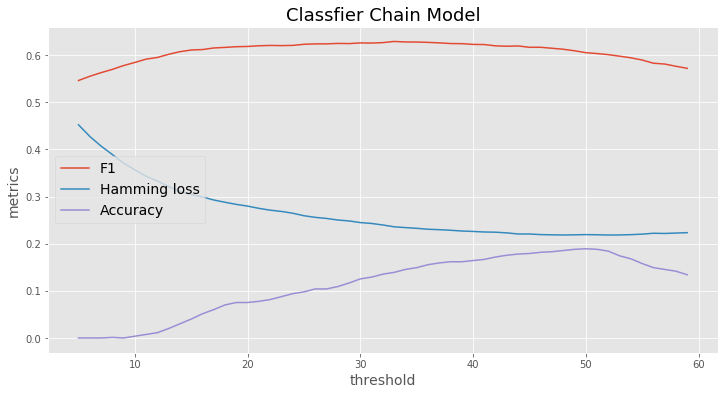

In [15]:
#for the next classifier we need to remove from y-train, y-test categories which equal 0 for all train samples
cc_classifier = ClassifierChain(LogisticRegression(solver='warn'))
cc_classifier.fit(X_train, y_train)
cc_predictions_proba = cc_classifier.predict_proba(X_test)
#for plotting metrics as a function of threashold
th = []
f = []
ham = []
ac = []
for t in range (5,60): # threshold value
    y_pred_new = (cc_predictions_proba >= t/100).astype(int)
#     print("t =" ,t/100)
#     print("Accuracy = ",accuracy_score(y_test,y_pred_new))
#     print("F1 = ",f1_score(y_test,y_pred_new, average="micro"))
#     print("Hamming loss = ",hamming_loss(y_test,y_pred_new))
    th.append(t)
    ac.append(accuracy_score(y_test,y_pred_new))
    f.append(f1_score(y_test,y_pred_new, average="micro"))
    ham.append(hamming_loss(y_test,y_pred_new))
plt.rcParams["figure.figsize"] = (12,6)
with plt.style.context('ggplot'):
    plt.plot(th, f)
    plt.plot(th, ham)
    plt.plot(th, ac)
    plt.legend(['F1', 'Hamming loss', 'Accuracy'], loc='center left', fontsize = 14)
    plt.ylabel("metrics", fontsize = 14)
    plt.xlabel("threshold", fontsize = 14)
    plt.title("Classfier Chain Model", fontsize = 18)
plt.show()

In [16]:
# using classifier chains
# initialize classifier chains multi-label classifier
classifier = ClassifierChain(LogisticRegression())
# Training logistic regression model on train data
classifier.fit(X_train, y_train)
# predict
predictions = classifier.predict(X_test)

In [17]:
# accuracy   None, 'micro', 'macro', 'weighted', 'samples'
Accuracy = accuracy_score(y_test,predictions.toarray())
Micro_Precision = precision_score(y_test,predictions, average='micro')
Micro_Recall = recall_score(y_test,predictions, average='micro')
Micro_F1 = f1_score(y_test,predictions, average='micro')
Micro_Average_Prec = average_precision_score(y_test, predictions.toarray(), average='micro')
Macro_Precision = precision_score(y_test,predictions, average='macro')
Macro_Recall = recall_score(y_test,predictions, average='macro')
Macro_F1 = f1_score(y_test,predictions, average='macro')
Macro_Average_Prec = average_precision_score(y_test, predictions.toarray(), average='macro')
Samples_Average_Prec = average_precision_score(y_test, predictions.toarray(), average='samples')
Weighted_Average_Prec = average_precision_score(y_test, predictions.toarray(), average='weighted')
Hamming_loss = hamming_loss(y_test,predictions)
Ranking_loss = label_ranking_loss(y_test, predictions.toarray())
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
#fpr["micro"], tpr["micro"], _  = roc_curve(y_test, predictions)
fpr, tpr, thresholds = roc_curve(y_test.ravel(), predictions.toarray().ravel())
Micro_Roc_auc = auc(fpr, tpr)
Coverage_error = coverage_error(y_test, predictions.toarray())
label_ranking_avg_prec_score = label_ranking_average_precision_score(y_test, predictions.toarray())
Jaccard_score = jaccard_score(y_test, predictions, average='samples')
Jaccard_score_macro = jaccard_score(y_test, predictions, average='macro')
print("ClassifierChain Accuracy = ",Accuracy)
print("ClassifierChain Micro_Precision = ",Micro_Precision)
print("ClassifierChain Micro_Recall = ",Micro_Recall)
print("ClassifierChain Micro_F1 = ",Micro_F1)
print("ClassifierChain Micro_Average_Prec = ",Micro_Average_Prec)
print("ClassifierChain Macro_Precision = ",Macro_Precision)
print("ClassifierChain Macro_Recall = ",Macro_Recall)
print("ClassifierChain Macro_F1 = ",Macro_F1)
print("ClassifierChain Macro_Average_Prec = ",Macro_Average_Prec)
print("ClassifierChain Samples_Average_Prec = ",Samples_Average_Prec)
print("ClassifierChain Weighted_Average_Prec = ",Weighted_Average_Prec)
print("ClassifierChain Hamming_loss = ",Hamming_loss)
print("ClassifierChain Ranking_loss = ",Ranking_loss)
print("ClassifierChain Micro_Roc_auc = ",Micro_Roc_auc)
print("ClassifierChain Coverage_error = ",Coverage_error)
print("ClassifierChain label_ranking_average_precision_score = ",label_ranking_avg_prec_score)
print("ClassifierChain Jaccard_score = ",Jaccard_score)
print("ClassifierChain Jaccard_score_macro = ",Jaccard_score_macro)
Eval6 = ['ClassifierChain',Accuracy,Micro_Precision,Micro_Recall,Micro_F1,Micro_Average_Prec,
         Macro_Precision,Macro_Recall,Macro_F1,Macro_Average_Prec,Samples_Average_Prec,Weighted_Average_Prec,Hamming_loss,
         Ranking_loss,Micro_Roc_auc,Coverage_error,label_ranking_avg_prec_score,Jaccard_score,Jaccard_score_macro]
Evals.append(Eval6)

ClassifierChain Accuracy =  0.18922305764411027
ClassifierChain Micro_Precision =  0.6584766584766585
ClassifierChain Micro_Recall =  0.5596658711217184
ClassifierChain Micro_F1 =  0.6050636994033219
ClassifierChain Micro_Average_Prec =  0.5006429169761127
ClassifierChain Macro_Precision =  0.45520623266570154
ClassifierChain Macro_Recall =  0.35942794283291757
ClassifierChain Macro_F1 =  0.38095142083375133
ClassifierChain Macro_Average_Prec =  0.3605168907831081
ClassifierChain Samples_Average_Prec =  0.5815998329156225
ClassifierChain Weighted_Average_Prec =  0.515870641568513
ClassifierChain Hamming_loss =  0.21920873612602937
ClassifierChain Ranking_loss =  0.4835657753353779
ClassifierChain Micro_Roc_auc =  0.7176206593460255
ClassifierChain Coverage_error =  11.253132832080201
ClassifierChain label_ranking_average_precision_score =  0.5815998329156239
ClassifierChain Jaccard_score =  0.47314317539881445
ClassifierChain Jaccard_score_macro =  0.27375318226871637


# 3.5. Multiple Binary Classifications - (One Vs Rest Classifier)


In [18]:
# Using pipeline for applying logistic regression and one vs rest classifier
LogReg_pipeline = Pipeline([('clf', OneVsRestClassifier(LogisticRegression(solver='sag'), n_jobs=-1)),])
# Training logistic regression model on train data
LogReg_pipeline.fit(X_train,y_train )
# calculating test accuracy
Logprediction = LogReg_pipeline.predict(X_test)

In [19]:
# accuracy   None, 'micro', 'macro', 'weighted', 'samples'
Accuracy = accuracy_score(y_test,Logprediction)
Micro_Precision = precision_score(y_test,Logprediction, average='micro')
Micro_Recall = recall_score(y_test,Logprediction, average='micro')
Micro_F1 = f1_score(y_test,Logprediction, average='micro')
Micro_Average_Prec = average_precision_score(y_test, Logprediction, average='micro')
Macro_Precision = precision_score(y_test,Logprediction, average='macro')
Macro_Recall = recall_score(y_test,Logprediction, average='macro')
Macro_F1 = f1_score(y_test,Logprediction, average='macro')
Macro_Average_Prec = average_precision_score(y_test, Logprediction, average='macro')
Samples_Average_Prec = average_precision_score(y_test, Logprediction, average='samples')
Weighted_Average_Prec = average_precision_score(y_test, Logprediction, average='weighted')
Hamming_loss = hamming_loss(y_test,Logprediction)
Ranking_loss = label_ranking_loss(y_test, Logprediction)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), Logprediction.ravel())
Micro_Roc_auc = auc(fpr["micro"], tpr["micro"])
Coverage_error = coverage_error(y_test, Logprediction)
label_ranking_avg_prec_score = label_ranking_average_precision_score(y_test, Logprediction)
Jaccard_score = jaccard_score(y_test, Logprediction, average='samples')
Jaccard_score_macro = jaccard_score(y_test, Logprediction, average='macro')
print("OneVsRestClassifier_LogisticRegression Accuracy = ",Accuracy)
print("OneVsRestClassifier_LogisticRegression Micro_Precision = ",Micro_Precision)
print("OneVsRestClassifier_LogisticRegression Micro_Recall = ",Micro_Recall)
print("OneVsRestClassifier_LogisticRegression Micro_F1 = ",Micro_F1)
print("OneVsRestClassifier_LogisticRegression Micro_Average_Prec = ",Micro_Average_Prec)
print("OneVsRestClassifier_LogisticRegression Macro_Precision = ",Macro_Precision)
print("OneVsRestClassifier_LogisticRegression Macro_Recall = ",Macro_Recall)
print("OneVsRestClassifier_LogisticRegression Macro_F1 = ",Macro_F1)
print("OneVsRestClassifier_LogisticRegression Macro_Average_Prec = ",Macro_Average_Prec)
print("OneVsRestClassifier_LogisticRegression Samples_Average_Prec = ",Samples_Average_Prec)
print("OneVsRestClassifier_LogisticRegression Weighted_Average_Prec = ",Weighted_Average_Prec)
print("OneVsRestClassifier_LogisticRegression Hamming_loss = ",Hamming_loss)
print("OneVsRestClassifier_LogisticRegression Ranking_loss = ",Ranking_loss)
print("OneVsRestClassifier_LogisticRegression Micro_Roc_auc = ",Micro_Roc_auc)
print("OneVsRestClassifier_LogisticRegression Coverage_error = ",Coverage_error)
print("OneVsRestClassifier_LogisticRegression label_ranking_average_precision_score = ",label_ranking_avg_prec_score)
print("OneVsRestClassifier_LogisticRegression Jaccard_score = ",Jaccard_score)
print("OneVsRestClassifier_LogisticRegression Jaccard_score_macro = ",Jaccard_score_macro)
Eval7 = ['OneVsRestClassifier_LogisticRegression',Accuracy,Micro_Precision,Micro_Recall,Micro_F1,Micro_Average_Prec,
         Macro_Precision,Macro_Recall,Macro_F1,Macro_Average_Prec,Samples_Average_Prec,Weighted_Average_Prec,Hamming_loss,
         Ranking_loss,Micro_Roc_auc,Coverage_error,label_ranking_avg_prec_score,Jaccard_score,Jaccard_score_macro]
Evals.append(Eval7)

OneVsRestClassifier_LogisticRegression Accuracy =  0.14035087719298245
OneVsRestClassifier_LogisticRegression Micro_Precision =  0.6913716814159292
OneVsRestClassifier_LogisticRegression Micro_Recall =  0.5593675417661098
OneVsRestClassifier_LogisticRegression Micro_F1 =  0.6184036939313985
OneVsRestClassifier_LogisticRegression Micro_Average_Prec =  0.5189363916647914
OneVsRestClassifier_LogisticRegression Macro_Precision =  0.44916758012112384
OneVsRestClassifier_LogisticRegression Macro_Recall =  0.32848219140102003
OneVsRestClassifier_LogisticRegression Macro_F1 =  0.34016570217314984
OneVsRestClassifier_LogisticRegression Macro_Average_Prec =  0.3560463589760258
OneVsRestClassifier_LogisticRegression Samples_Average_Prec =  0.5896689392131121
OneVsRestClassifier_LogisticRegression Weighted_Average_Prec =  0.5151081130321766
OneVsRestClassifier_LogisticRegression Hamming_loss =  0.207124955245256
OneVsRestClassifier_LogisticRegression Ranking_loss =  0.47312744168947174
OneVsRestCl

In [20]:
df = pd.DataFrame(Evals, columns=['Classifier','Accuracy','Micro_Pre','Micro_Recall','Micro_F1','Micro_Avg_Prec',
         'Macro_Prec','Macro_Recall','Macro_F1','Macro_Avg_Prec','Samples_Avg_Prec','Weighted_Avg_Prec','Hamming_loss',
         'Ranking_loss','Micro_Roc_auc','Coverage_error','label_ranking_avg_prec_score','Jaccard_score','Jaccard_score_macro'])
df

,Classifier,Accuracy,Micro_Pre,Micro_Recall,Micro_F1,Micro_Avg_Prec,Macro_Prec,Macro_Recall,Macro_F1,Macro_Avg_Prec,Samples_Avg_Prec,Weighted_Avg_Prec,Hamming_loss,Ranking_loss,Micro_Roc_auc,Coverage_error,label_ranking_avg_prec_score,Jaccard_score,Jaccard_score_macro
0,BinaryReMLP,0.121554,0.719549,0.495227,0.586676,0.507790,0.365801,0.264182,0.280091,0.342819,0.583503,0.500127,0.209363,0.524453,0.706245,12.414787,0.583503,0.449106,0.209127
1,BinaryReSVC,0.015038,0.736714,0.359785,0.483464,0.457146,0.226924,0.151655,0.137319,0.304477,0.530376,0.456516,0.230666,0.658268,0.652335,13.805764,0.530376,0.339806,0.113528
2,BinaryReGaussianNB,0.095238,0.493365,0.621122,0.549921,0.420117,0.414782,0.545941,0.454727,0.367600,0.499614,0.524449,0.305048,0.520814,0.673860,11.507519,0.499614,0.422586,0.315387
3,LabelPowersetLogisticRegression,0.253133,0.654254,0.607995,0.630277,0.515399,0.427066,0.380578,0.373637,0.358191,0.608663,0.517251,0.214017,0.433832,0.735136,10.667920,0.608663,0.519542,0.276195
4,MLkNN,0.169173,0.681007,0.580847,0.626952,0.521322,0.503180,0.371406,0.400031,0.370341,0.598689,0.527619,0.207393,0.459327,0.732112,11.362155,0.598689,0.496701,0.288686
5,ClassifierChain,0.189223,0.658477,0.559666,0.605064,0.500643,0.455206,0.359428,0.380951,0.360517,0.581600,0.515871,0.219209,0.483566,0.717621,11.253133,0.581600,0.473143,0.273753
6,OneVsRestClassifier_LogisticRegression,0.140351,0.691372,0.559368,0.618404,0.518936,0.449168,0.328482,0.340166,0.356046,0.589669,0.515108,0.207125,0.473127,0.726167,11.709273,0.589669,0.481387,0.253728


In [ ]:
# Print the confusion matrix
from sklearn import metrics
from sklearn.metrics import multilabel_confusion_matrix
#print(multilabel_confusion_matrix(y_test, Logprediction))

# Print the precision and recall, among other metrics
print(metrics.classification_report(y_test, Logprediction))

In [ ]:
#https://www.programcreek.com/python/example/81207/sklearn.metrics.roc_curve
def print_roc(y_true, y_scores):
        '''
        Prints the ROC for this model.
        '''
        fpr, tpr, thresholds = roc_curve(y_test.toarray().ravel(), y_scores.ravel())
        auc_score = auc(fpr, tpr)
        
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)'% auc_score)
        plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic')
        plt.legend(loc="lower right")
        plt.show() 
print_roc(y_test, Logprediction)

In [ ]:
https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py

In [ ]:
https://towardsdatascience.com/multi-class-metrics-made-simple-part-i-precision-and-recall-9250280bddc2

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=0))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()